In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/cleaned_reviews.tsv", sep="\t")

In [4]:
df

,rating,vote,verified,reviewTime,reviewerName,reviewText,summary
0,5,0,True,"07 14, 2014",Alvey,great read every issue,Five Stars
1,3,0,True,"06 24, 2014",Jeff A Milne,magazine great time technology magazine new st...,Great While it lasted
2,5,0,True,"06 1, 2014",P. R THOMPSON,ive read maximum pc mpc many year article tech...,For Both the Newbie and The Advanced PC User
3,5,0,True,"05 15, 2014",Earle Williams,order magazine grandson then 7 go 30 wasis dep...,Great Gift
4,4,0,True,"03 28, 2014",JJM,subscribed nook version year thoroughly enjoy ...,Decent magazine at a good price
...,...,...,...,...,...,...,...
185021,4,0,True,"12 10, 2013",Peggy J. Geyer,music class age 0 4 music together use stick t...,Great gift for small children
185022,5,0,True,"09 5, 2007",Kin P. Lo,simple basic metronome fancy function suppose ...,bargain choice for a basic metronome
185023,5,0,True,"08 28, 2007",Michael Pearlman,use metronome 30 cpr training need work servic...,It works
185024,5,0,True,"07 7, 2007",J. A. Eastman,order use keep beat exercise say front musical...,Excellent Buy


In [5]:
five_star_reviews = df.loc[df.rating == 5]
one_star_reviews = df.loc[df.rating == 1]

In [6]:
len(five_star_reviews)

128224

In [7]:
len(one_star_reviews)

12966

In [8]:
one_star_words = one_star_reviews.assign(word = one_star_reviews["reviewText"].str.split()).explode("word")["word"]
five_star_words = five_star_reviews.assign(word = five_star_reviews["reviewText"].str.split()).explode("word")["word"]
one_star_words.head()

45    unbelievable
45          amount
45              ad
45               5
45            year
Name: word, dtype: object

In [9]:
counted_one_star: dict[str, int] = (one_star_words.value_counts()).head(1000).to_dict()
counted_five_star: dict[str, int] = (five_star_words.value_counts()).head(1000).to_dict()

In [10]:
wc_one_star = WordCloud(width=1200, height=500, max_words=500).generate_from_frequencies(counted_one_star)
wc_one_star.to_file("one_star_wordcloud.png")
wc_five_star = WordCloud(width=1200, height=500, max_words=500).generate_from_frequencies(counted_five_star)
wc_five_star.to_file("five_star_wordcloud.png")

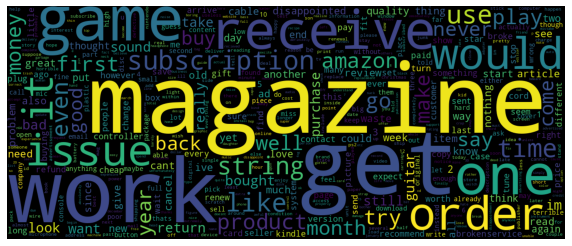

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(wc_one_star)
plt.axis('off')
plt.show()

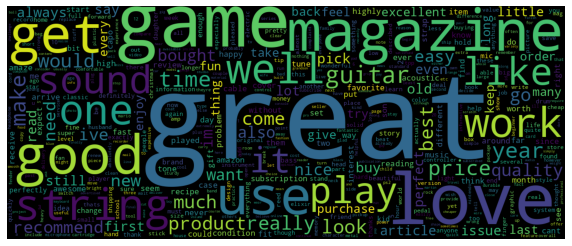

In [12]:
plt.figure(figsize=(10, 10))
plt.imshow(wc_five_star)
plt.axis('off')
plt.show()